In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [21]:
data = pd.read_csv("./fuel_econ.csv")
data.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [22]:
data.describe()

,id,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
count,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000
mean,36006.724357,2015.500891,5.468313,2.950573,23.660982,59.239247,21.830462,28.044011,29.973842,42.850295,24.791339,376.564266,5.668872,5.659201
std,2189.349923,1.694775,1.878319,1.305901,37.724901,48.667549,6.246273,9.087195,5.747571,9.100423,6.003246,92.338892,1.755860,1.754589
min,32204.000000,2013.000000,2.000000,0.600000,0.000000,0.000000,10.540200,12.900000,16.559400,21.800000,12.821700,29.000000,1.000000,1.000000
25%,34087.000000,2014.000000,4.000000,2.000000,0.000000,0.000000,17.746900,22.200000,25.754200,36.000000,20.658100,315.000000,5.000000,5.000000
50%,36020.000000,2015.000000,5.000000,2.500000,0.000000,91.000000,20.823200,26.400000,29.633800,42.200000,24.000000,369.000000,5.000000,5.000000
75%,37935.000000,2017.000000,6.000000,3.600000,70.000000,100.000000,24.981400,32.264800,33.773100,48.900000,28.227100,429.000000,7.000000,7.000000
max,39901.000000,2018.000000,12.000000,7.000000,102.000000,127.000000,57.808800,83.559800,59.416900,79.100000,57.782400,692.000000,10.000000,10.000000


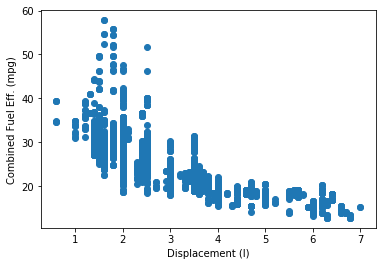

In [27]:
plt.scatter(data = data, x="displ", y="comb");
plt.xlabel("Displacement (l)");
plt.ylabel("Combined Fuel Eff. (mpg)");

We can see generally a negative relationship between the two variables, as higher values of the x-axis variable are associated with decreasing values of the variable plotted on the y-axis.  

An alternative approach is Seaborn's regplot function that combines scatter plot creation with regression function fitting

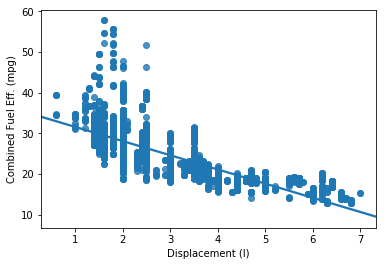

In [28]:
sb.regplot(data = data, x="displ", y="comb");
#sb.regplot(data = data, x="displ", y="comb", fit_reg = False);
plt.xlabel("Displacement (l)");
plt.ylabel("Combined Fuel Eff. (mpg)");

to apply a log transformation we can do the following


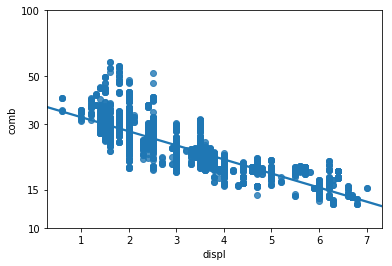

In [25]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sb.regplot(data['displ'], data['comb'].apply(log_trans));
tick_locs = [10, 15, 30, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs);

In the above plot, we can infer some kind of negative relationship between the two variables, but the degree of variability in the data and strength of relationship are fairly unclear. In cases like this, we may want to employ transparency and jitter to make the scatterplot more informative. Transparency can be added to a scatter call by adding the "alpha" parameter set to a value between 0 (fully transparent, not visible) and 1 (fully opaque).

Where more points overlap, the darker the image will be. Here, we can now see that there is a moderate negative relationship between the two numeric variables. Values of 0 and 10 on the x-axis are much rarer than the central values.

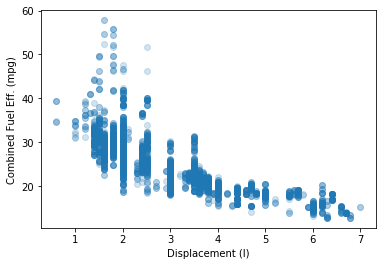

In [29]:
plt.scatter(data = data, x="displ", y="comb", alpha = 1/5);
plt.xlabel("Displacement (l)");
plt.ylabel("Combined Fuel Eff. (mpg)");

As an alternative or companion to transparency, we can also add jitter to move the position of each point slightly from its true value. This is not a direct option in the scatter function, but is a built-in option with seaborn's regplot function. x- and y- jitter can be added independently, and won't affect the fit of any regression function, if made:

The jitter settings will cause each point to be plotted in a uniform ±0.2 range of their true values. Note that transparency has been changed to be a dictionary assigned to the "scatter_kws" parameter. This is necessary so that transparency is specifically associated with the scatter component of the regplot function.

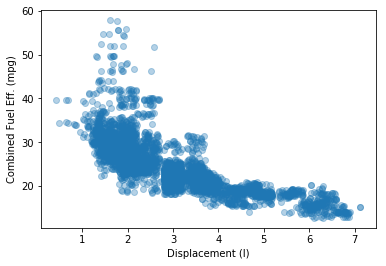

In [32]:
sb.regplot(data = data, x="displ", y="comb", fit_reg = False, 
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {"alpha": 1/3});
plt.xlabel("Displacement (l)");
plt.ylabel("Combined Fuel Eff. (mpg)");

Now lets take a look at fuel efficiency plotted against year

Text(0.5,0,'Year')

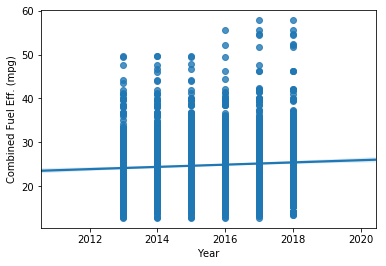

In [33]:
sb.regplot(data = data, x = "year", y = "comb")
plt.ylabel("Combined Fuel Eff. (mpg)")
plt.xlabel("Year");

Here we can't see the data very well and is a great candidate for jitter.  Since we want to move the x_values we will set the x_jitter to .3 which means that a point will be moved either .3 more or .3 less.   Just a reminder that this is only supported in regplat and not matplotlib scatter. Lets also add some alpha transparency. with alpha 0 is transparent and 1 is opaque.  Now we can start to see the shape of the data.  

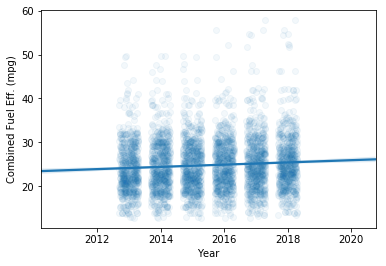

In [36]:
sb.regplot(data = data, x = "year", y = "comb", x_jitter = 0.3, scatter_kws = { "alpha": 1/20 })
plt.ylabel("Combined Fuel Eff. (mpg)")
plt.xlabel("Year");

SCATTER PLOT PRACTICE


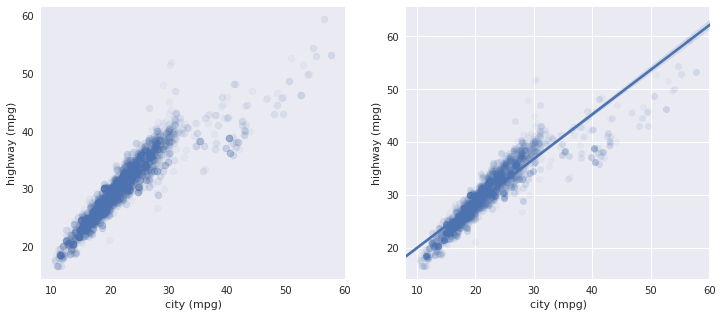

In [40]:
plt.figure(figsize = [12, 5])

plt.subplot(1,2,1)
plt.scatter(data = data, x = "city", y="highway", alpha=1/20)
plt.xlabel("city (mpg)")
plt.ylabel("highway (mpg)")
plt.grid()

plt.subplot(1,2,2)
# this seems to set the grid lines and background color.
sb.set(color_codes=True)
sb.regplot(data = data, x = "city", y = "highway", scatter_kws= {"alpha": 1/20});
plt.xlabel("city (mpg)")
plt.ylabel("highway (mpg)");